In [1]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 260.1/260.1 kB 469.6 kB/s eta 0:00:00
     ------------------------------------ 184.8/184.8 kB 859.9 kB/s eta 0:00:00
     ---------------------------------------- 64.6/64.6 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 913.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import librosa, IPython
import librosa.display
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sample_file = 'D:\My Docs\Projects\Music Genre Prediction\Data\genres_original\classical\classical.00003.wav'
Signal , sr = librosa.load(sample_file , sr = 22050)

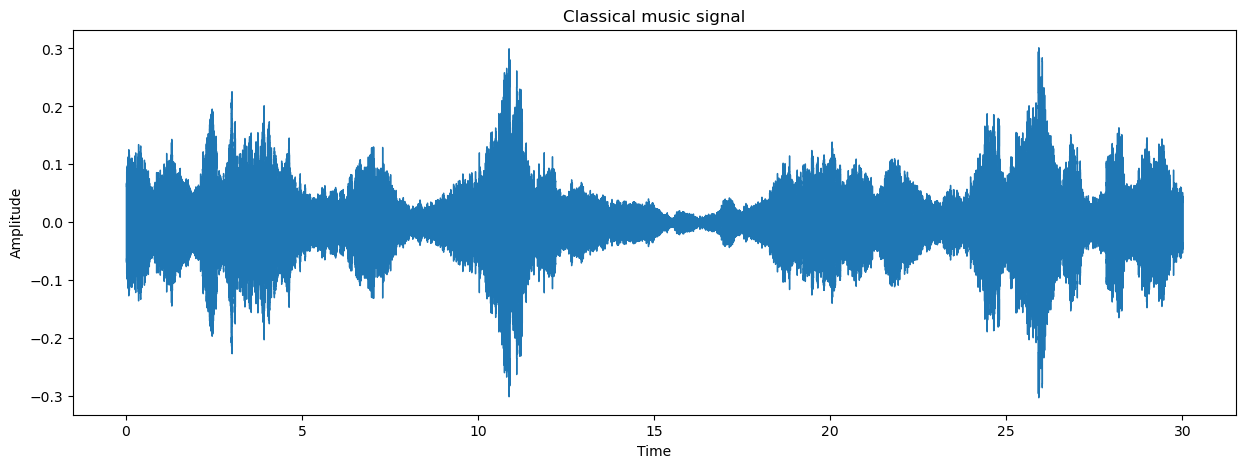

In [3]:
plt.figure(figsize=(15,5))
librosa.display.waveshow(Signal , sr = sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Classical music signal")
plt.show()

The `librosa.load` function is a tool that opens audio files and prepares them for use. It reads the sound data from a file and can change how often the sound is measured if needed. When it's done, it gives back two things: the actual sound data as a list of numbers, and a number that tells how many times per second the sound was measured. This function is useful because it makes it easy to get sound information from files and have it ready for other tasks, like analyzing or changing the audio.

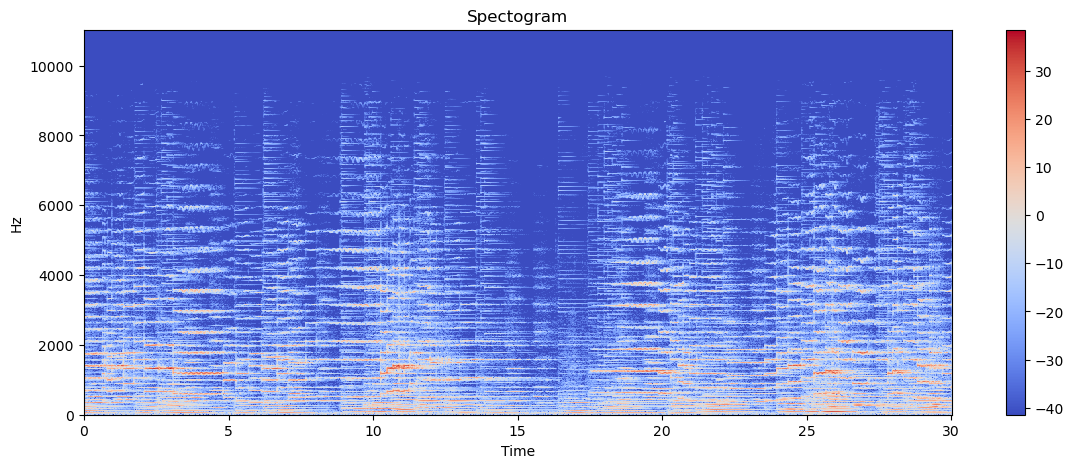

In [4]:
X = librosa.stft(Signal)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title("Spectogram")
plt.colorbar()

This code segment transforms an audio signal into a spectrogram, which is a time-frequency representation that allows you to see how the frequency content of the sound changes over time. By analyzing the spectrogram, you can identify different instruments, musical notes, and other characteristics of the audio.

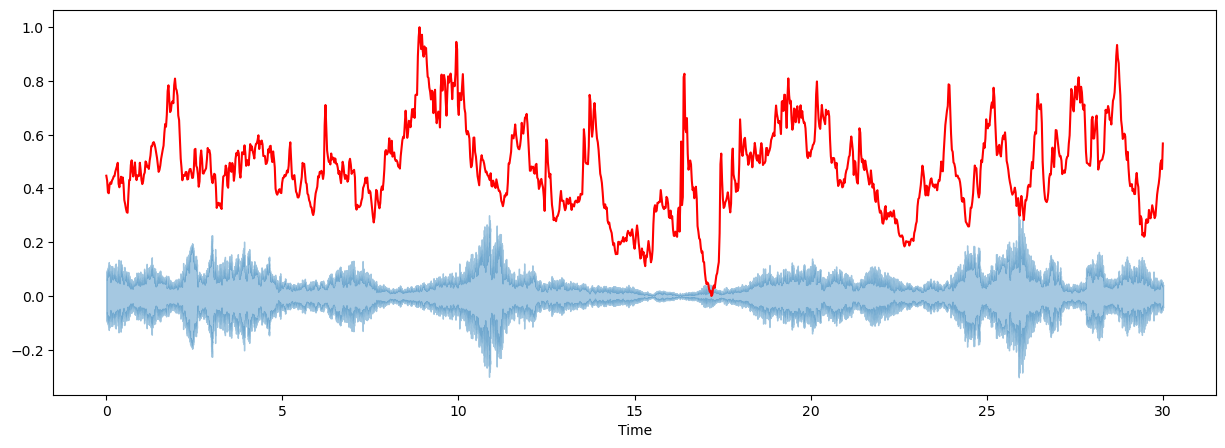

In [5]:
spectral_centroids = librosa.feature.spectral_centroid(y=Signal, sr=sr)[0]
#.spectral_centroid will return an array with columns equal to the number of frames present in your sample.

# Computing the time variable for visualization
plt.figure(figsize=(15, 5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(Signal, axis=0):
    return sklearn.preprocessing.minmax_scale(Signal, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(Signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

This code helps you see two important parts of a sound at the same time. It shows a picture of how loud the sound is over time, and another picture of what the main pitch is doing. When you look at both pictures together, you can see how the sound changes. For example, you might notice when the main pitch suddenly jumps up or down. This could mean something interesting is happening in the music, like a new instrument starting to play or a big change in the song. This way of looking at sound helps you understand more about what's going on than just listening with your ears.

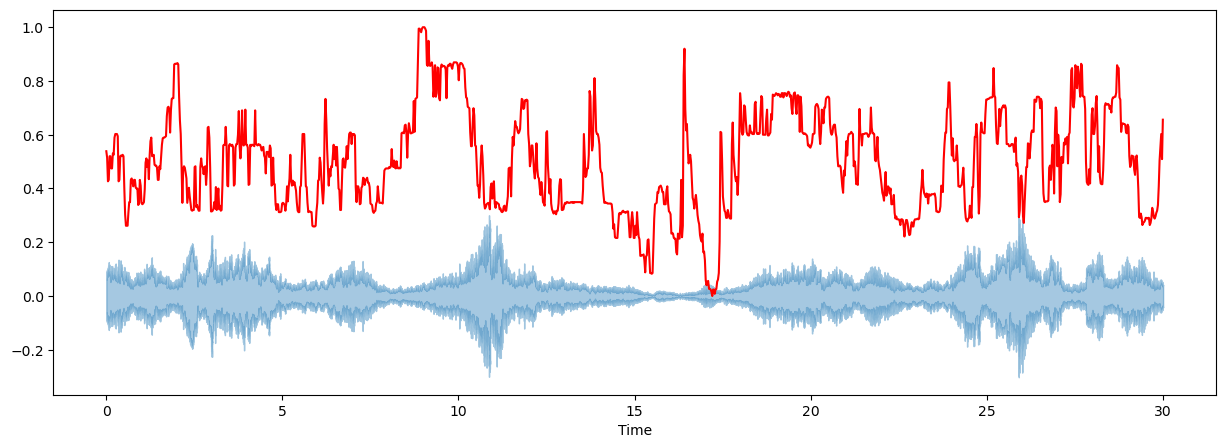

In [8]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=Signal+0.01, sr=sr)[0]
plt.figure(figsize=(15, 5))
librosa.display.waveshow(Signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

This code creates a picture that shows two important things about a sound at once. It draws the shape of the sound wave, which looks like a wavy gray line. On top of that, it adds a red line that shows the "spectral rolloff" - a measure of how the sound's frequency makeup changes over time. By putting these two things in one picture, we can see how the sound's overall shape and its frequency content change together as the sound plays. This can help us spot interesting parts or changes in the music or sound that we might miss just by listening with our ears.

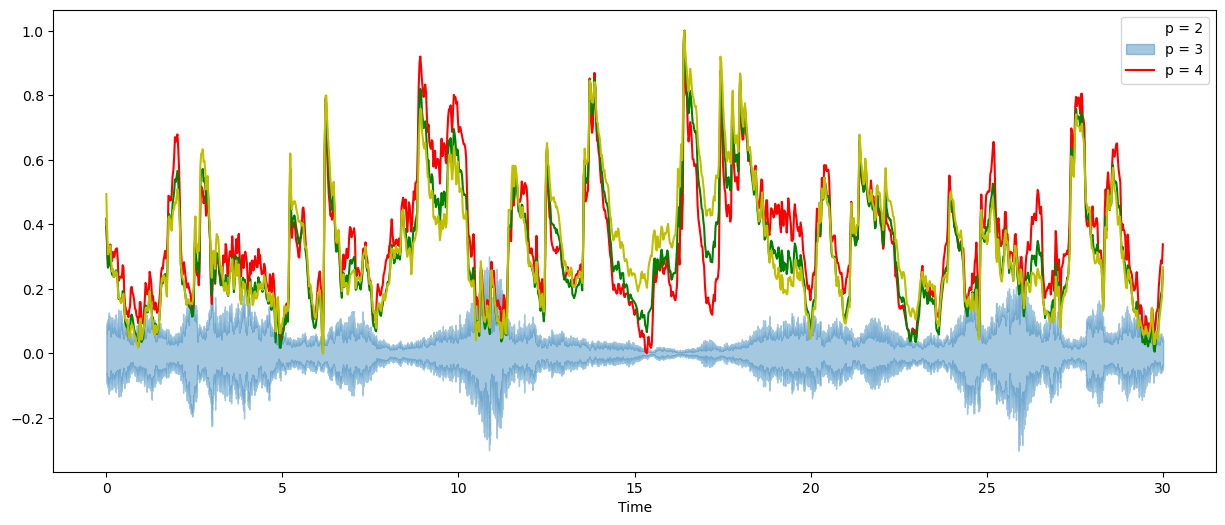

In [11]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=Signal+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=Signal+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=Signal+0.01, sr=sr, p=4)[0]

plt.figure(figsize=(15, 6))
librosa.display.waveshow(Signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

This code creates a picture that shows how the sound's frequency spread changes over time. It calculates something called "spectral bandwidth" in three different ways, each giving slightly different information about the sound's frequency makeup. The picture shows the sound wave as a gray wavy line, with three colored lines on top: red, green, and yellow. These colored lines represent the different spectral bandwidth measurements. By looking at this picture, we can see how the spread of frequencies in the sound changes as it plays. This can help us understand how the sound's character evolves, which might be useful for analyzing music or identifying different parts of a sound.

In [12]:
IPython.display.Audio(Signal, rate=sr)

In [13]:
n0 = 9000
n1 = 9100
zero_crossings = librosa.zero_crossings(Signal[n0:n1], pad=False)
print(sum(zero_crossings))

14


This code looks at a small part of a sound wave to count how many times it crosses the zero line. The zero line is like the middle of the sound wave, where it's neither loud nor soft. When the sound wave goes from above this line to below it (or the other way), we call that a zero-crossing. The code picks out a short piece of the sound (100 samples long) and counts these crossings. In this case, it found 14 crossings. This number can tell us something about the sound - like how high or low its pitch might be, or how complex the sound is in that short moment. It's a simple way to get some information about what's happening in the sound without listening to it.

# Advanced analysis coming soon in the next notebook!